COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas.tseries
import pandasql
from pandasql import sqldf
%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

In [2]:
df = pd.read_csv('COVID_19 Cases.csv')

In [3]:
df.head()

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
0,3/11/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
1,3/11/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
2,3/11/2020,US,Arizona,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3,3/11/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
4,2/15/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.8162,-111.2845


In [4]:
df.isna().any().any()

True

In [5]:
for col in df.columns:
    if df[col].isna().any() == True:
        print(f'The {col} column contains missing values.')

The Province_State column contains missing values.


In [6]:
df.Province_State.unique()

array(['Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin',
       'Manitoba', 'Maine', 'Gansu', 'Ningxia', 'French Polynesia',
       'Sichuan', 'Heilongjiang', 'Australian Capital Territory',
       'Sint Maarten', 'Fujian', 'Isle of Man', 'Idaho', 'Mississippi',
       'Denmark', 'Hong Kong', 'Queensland', 'New Brunswick', 'Hebei',
       'Xinjiang', 'Yunnan', 'Western Australia', 'St Martin', 'Curacao',
       'Tianjin', 'Quebec', 'Netherlands', 'France', 'Grand Princess',
       'Alabama', 'Be

In [7]:
# Convert Data column to datetime
df.Date = pd.to_datetime(df.Date, format='%m/%d/%y', errors='ignore')

In [8]:
# Setting Date as dataframe index:
df.set_index('Date', inplace = True)

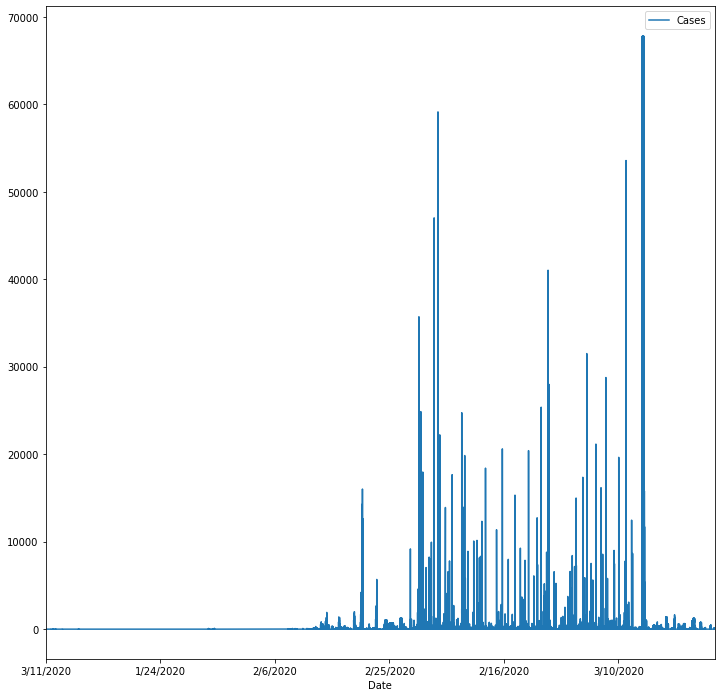

In [9]:
fig = plt.figure(figsize=(12,12))
ax = df.Cases.plot()


plt.legend()
plt.show()

In [13]:
pd.DataFrame?

In [11]:
countries_list = df.Country_Region.unique().tolist()

In [12]:
for country in countries_list:
    df[country] = pd.DataFrame(data=df, )

['US',
 'Canada',
 'China',
 'France',
 'Australia',
 'Netherlands',
 'United Kingdom',
 'Denmark',
 'Cruise Ships',
 'India',
 'Qatar',
 'Bangladesh',
 'Spain',
 'Bhutan',
 'Cameroon',
 'Taiwan*',
 'Brazil',
 'Vietnam',
 'Albania',
 'Ethiopia',
 'Cyprus',
 'Oman',
 'Greece',
 'Ecuador',
 'Mauritius',
 'Iran',
 'Martinique',
 'Italy',
 'Finland',
 'Namibia',
 'Guatemala',
 'Portugal',
 'Nicaragua',
 'Mauritania',
 'Congo (Brazzaville)',
 'Fiji',
 'Guyana',
 'Germany',
 'Uzbekistan',
 'South Africa',
 'Niger',
 'Georgia',
 'Saudi Arabia',
 'Maldives',
 'Gabon',
 'Grenada',
 'Guinea',
 'New Zealand',
 'Saint Lucia',
 'Mozambique',
 'Ireland',
 'Barbados',
 'Singapore',
 'Benin',
 "Cote d'Ivoire",
 'Malaysia',
 'Costa Rica',
 'Turkey',
 'Poland',
 'Ghana',
 'Venezuela',
 'Kuwait',
 'Uganda',
 'Czechia',
 'Zimbabwe',
 'Nigeria',
 'Kenya',
 'Kyrgyzstan',
 'Togo',
 'Sweden',
 'Congo (Kinshasa)',
 'Egypt',
 'Trinidad and Tobago',
 'Lithuania',
 'Cambodia',
 'Slovenia',
 'Eswatini',
 'Antigua 

In [19]:
df.columns

Index(['Country_Region', 'Province_State', 'Case_Type', 'Cases', 'Difference',
       'Prep_Flow_Runtime', 'Latest_Date', 'Lat', 'Long'],
      dtype='object')

In [ ]:
# For new CSV:

In [33]:
# Creating new DataFrame:
us_df = df[df.Country_Region == 'US']
            
us_df = us_df.groupby(['Province_State'])['Cases'].count()
us_df

Province_State
Alabama                  240
Alaska                   240
Arizona                  960
Arkansas                 240
California              6480
Colorado                2400
Connecticut              720
Delaware                 480
District of Columbia     480
Florida                 3360
Georgia                 2400
Guam                     240
Hawaii                   480
Idaho                    240
Illinois                1200
Indiana                 2160
Iowa                     720
Kansas                   480
Kentucky                 960
Louisiana                720
Maine                    240
Maryland                 960
Massachusetts           1680
Michigan                 720
Minnesota               1200
Mississippi              240
Missouri                 480
Montana                  240
Nebraska                 720
Nevada                   720
New Hampshire            720
New Jersey              2160
New Mexico               720
New York                1920

In [34]:
pd.DataFrame.to_csv(us_df)

'Province_State,Cases\nAlabama,240\nAlaska,240\nArizona,960\nArkansas,240\nCalifornia,6480\nColorado,2400\nConnecticut,720\nDelaware,480\nDistrict of Columbia,480\nFlorida,3360\nGeorgia,2400\nGuam,240\nHawaii,480\nIdaho,240\nIllinois,1200\nIndiana,2160\nIowa,720\nKansas,480\nKentucky,960\nLouisiana,720\nMaine,240\nMaryland,960\nMassachusetts,1680\nMichigan,720\nMinnesota,1200\nMississippi,240\nMissouri,480\nMontana,240\nNebraska,720\nNevada,720\nNew Hampshire,720\nNew Jersey,2160\nNew Mexico,720\nNew York,1920\nNorth Carolina,960\nNorth Dakota,240\nOhio,720\nOklahoma,480\nOregon,2400\nPennsylvania,1680\nPuerto Rico,240\nRhode Island,480\nSouth Carolina,1200\nSouth Dakota,1680\nTennessee,1200\nTexas,1920\nUtah,960\nVermont,480\nVirgin Islands,240\nVirginia,1680\nWashington,3120\nWest Virginia,240\nWisconsin,720\nWyoming,240\n'

In [37]:
df.to_csv('example.csv'

SyntaxError: invalid character in identifier (<ipython-input-37-edd02c5df86e>, line 1)

In [32]:
us_df = us_df.drop(columns=('Case_Type', 'Prep_Flow_Runtime', 'Lat', 'Long'), axis=1)
us_df

KeyError: "[('Case_Type', 'Prep_Flow_Runtime', 'Lat', 'Long')] not found in axis"

In [20]:
df_plot_cases = df.drop(columns=['Lat', 'Long', 'Province_State'], axis=1)

<Figure size 432x288 with 0 Axes>

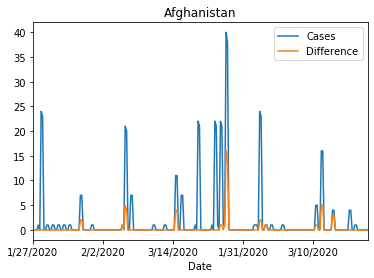

<Figure size 432x288 with 0 Axes>

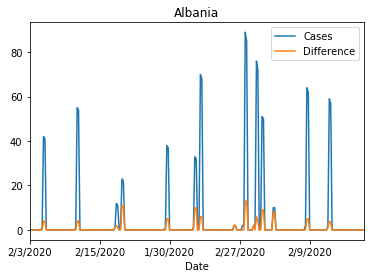

<Figure size 432x288 with 0 Axes>

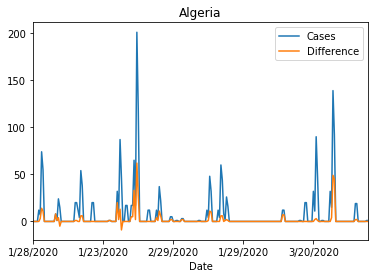

<Figure size 432x288 with 0 Axes>

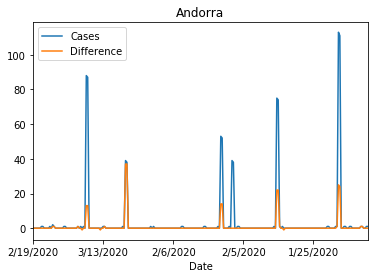

<Figure size 432x288 with 0 Axes>

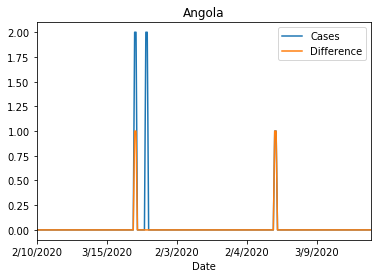

<Figure size 432x288 with 0 Axes>

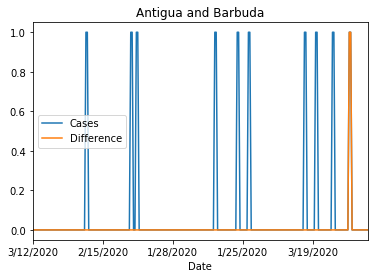

<Figure size 432x288 with 0 Axes>

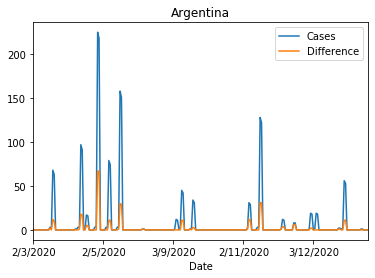

<Figure size 432x288 with 0 Axes>

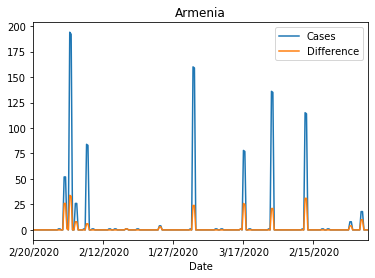

<Figure size 432x288 with 0 Axes>

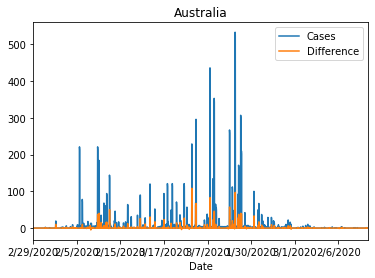

<Figure size 432x288 with 0 Axes>

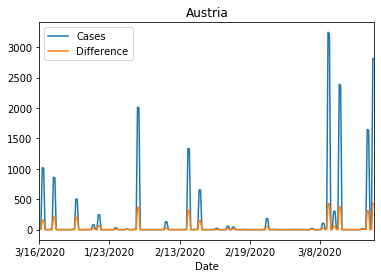

<Figure size 432x288 with 0 Axes>

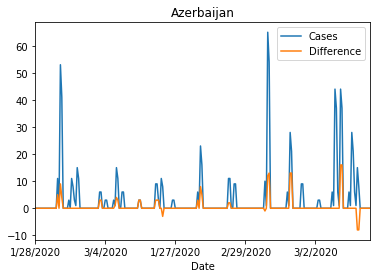

<Figure size 432x288 with 0 Axes>

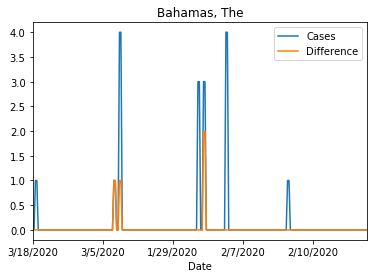

<Figure size 432x288 with 0 Axes>

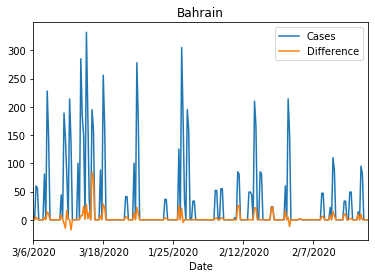

<Figure size 432x288 with 0 Axes>

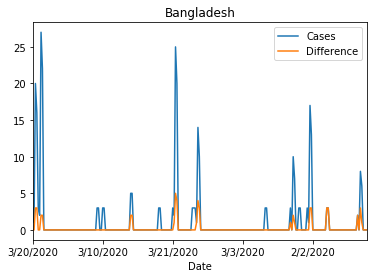

<Figure size 432x288 with 0 Axes>

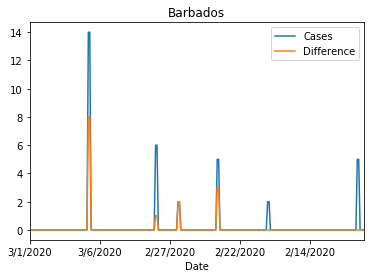

<Figure size 432x288 with 0 Axes>

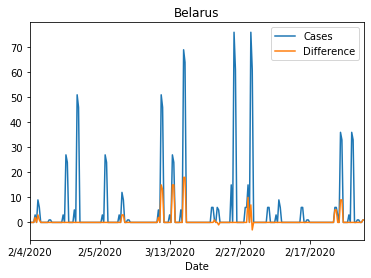

<Figure size 432x288 with 0 Axes>

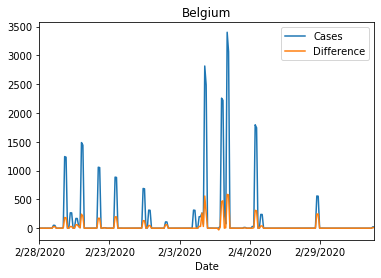

<Figure size 432x288 with 0 Axes>

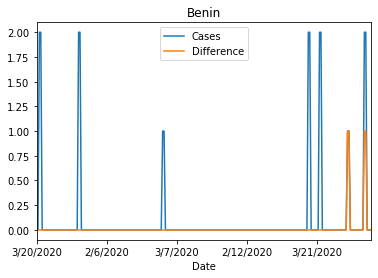

<Figure size 432x288 with 0 Axes>

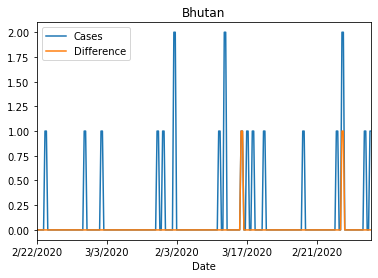

<Figure size 432x288 with 0 Axes>

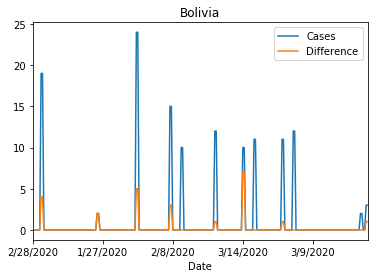

<Figure size 432x288 with 0 Axes>

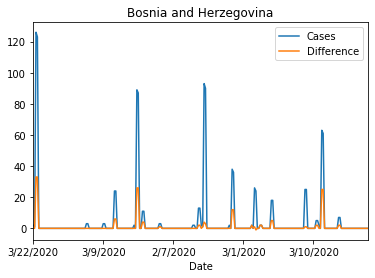

<Figure size 432x288 with 0 Axes>

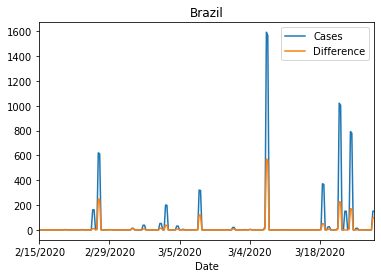

<Figure size 432x288 with 0 Axes>

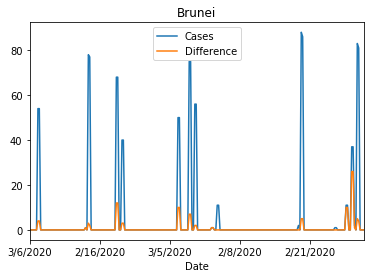

<Figure size 432x288 with 0 Axes>

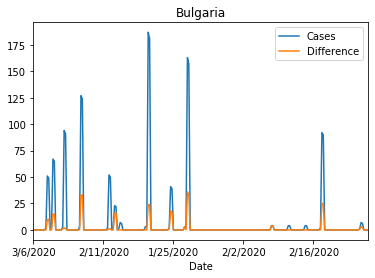

<Figure size 432x288 with 0 Axes>

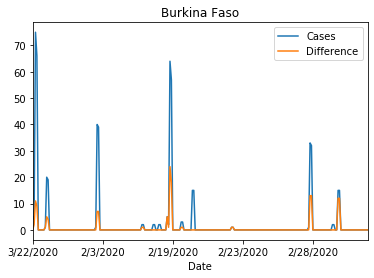

<Figure size 432x288 with 0 Axes>

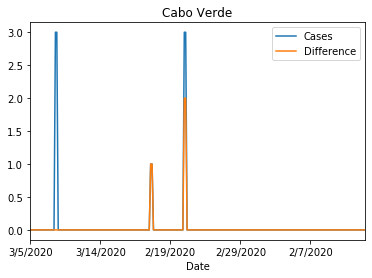

<Figure size 432x288 with 0 Axes>

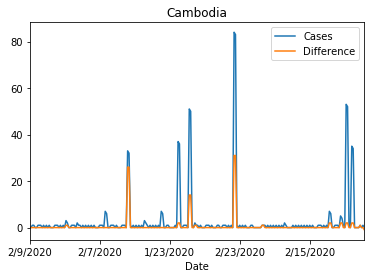

<Figure size 432x288 with 0 Axes>

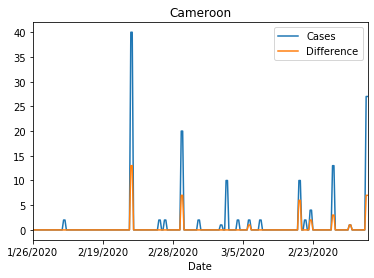

<Figure size 432x288 with 0 Axes>

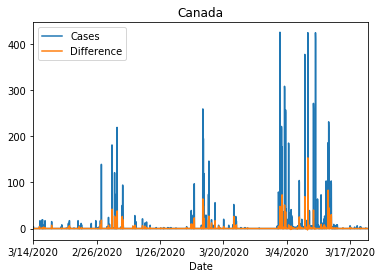

<Figure size 432x288 with 0 Axes>

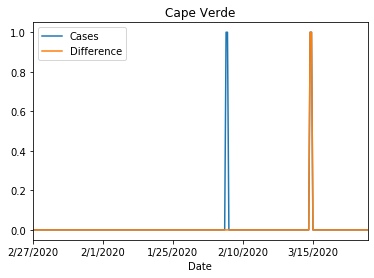

<Figure size 432x288 with 0 Axes>

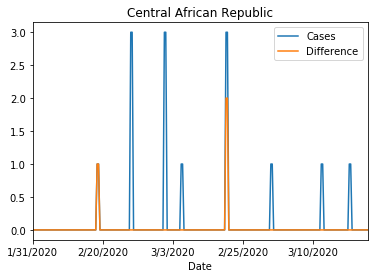

<Figure size 432x288 with 0 Axes>

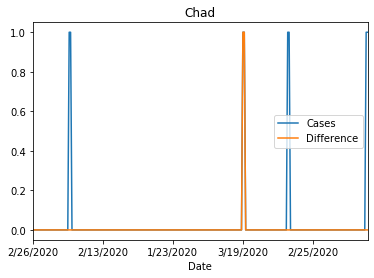

<Figure size 432x288 with 0 Axes>

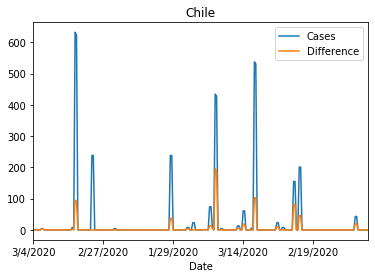

<Figure size 432x288 with 0 Axes>

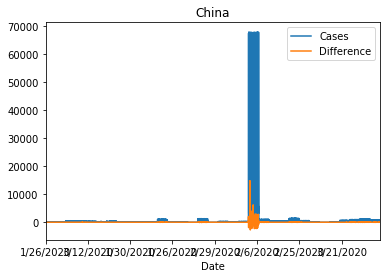

<Figure size 432x288 with 0 Axes>

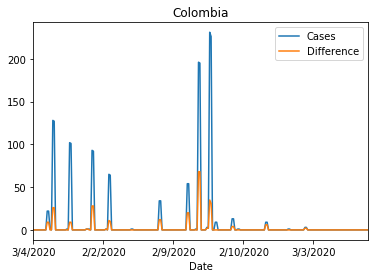

<Figure size 432x288 with 0 Axes>

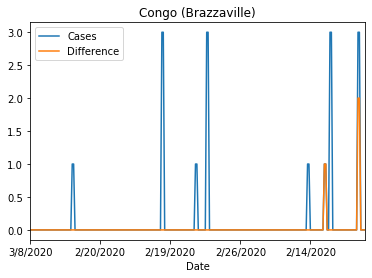

<Figure size 432x288 with 0 Axes>

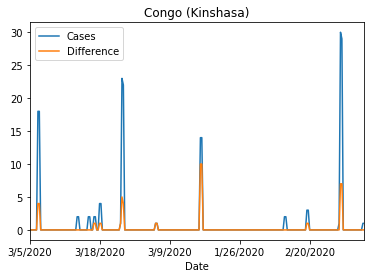

<Figure size 432x288 with 0 Axes>

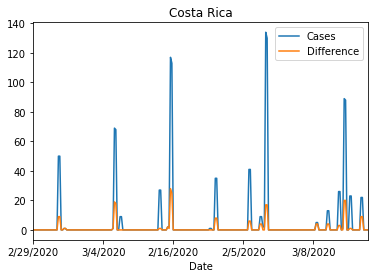

<Figure size 432x288 with 0 Axes>

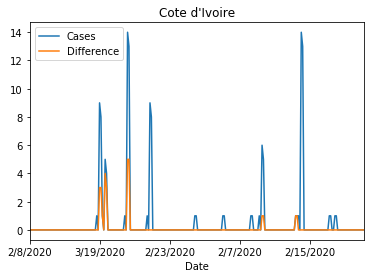

<Figure size 432x288 with 0 Axes>

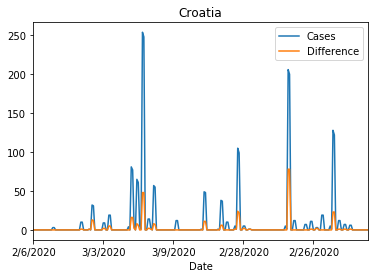

<Figure size 432x288 with 0 Axes>

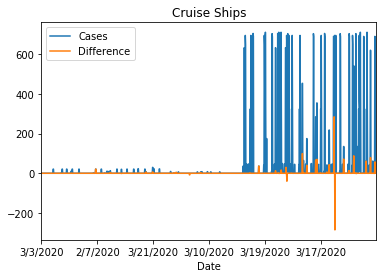

<Figure size 432x288 with 0 Axes>

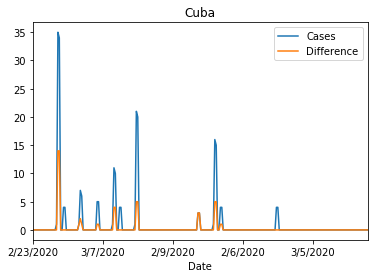

<Figure size 432x288 with 0 Axes>

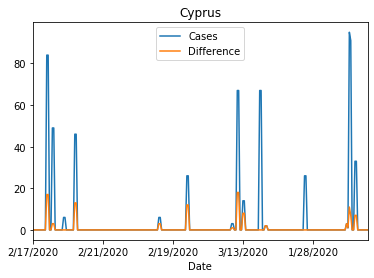

<Figure size 432x288 with 0 Axes>

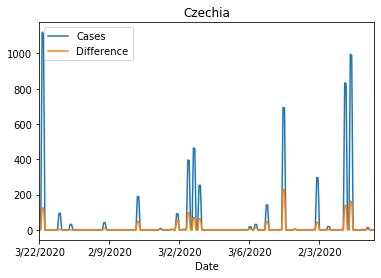

<Figure size 432x288 with 0 Axes>

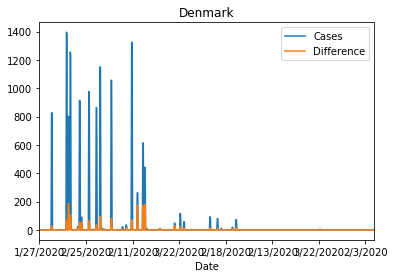

<Figure size 432x288 with 0 Axes>

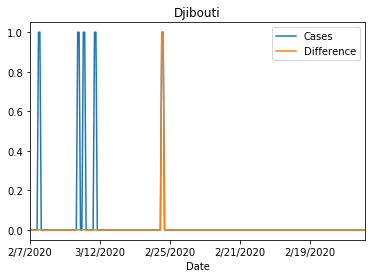

<Figure size 432x288 with 0 Axes>

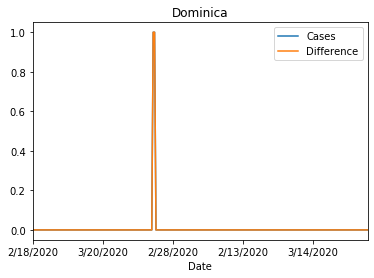

<Figure size 432x288 with 0 Axes>

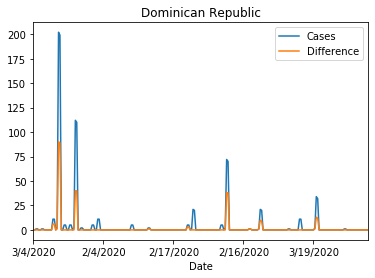

<Figure size 432x288 with 0 Axes>

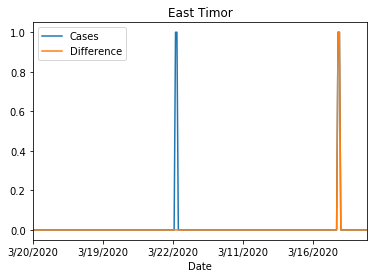

<Figure size 432x288 with 0 Axes>

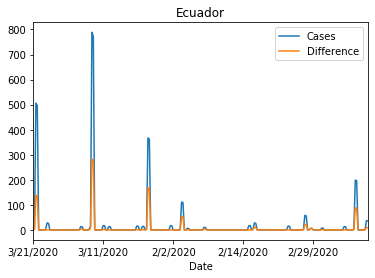

<Figure size 432x288 with 0 Axes>

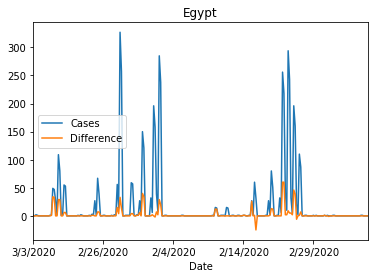

<Figure size 432x288 with 0 Axes>

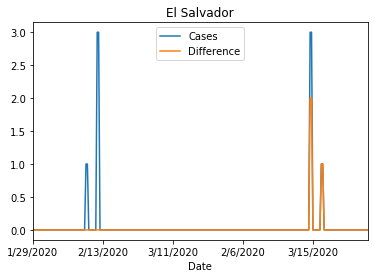

<Figure size 432x288 with 0 Axes>

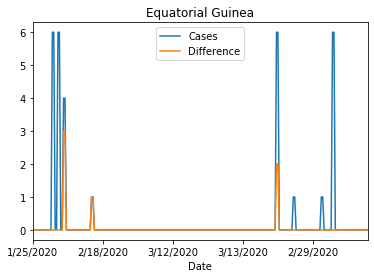

<Figure size 432x288 with 0 Axes>

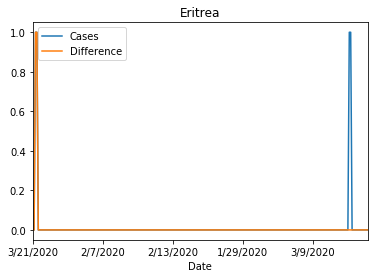

<Figure size 432x288 with 0 Axes>

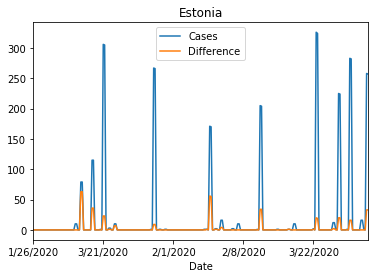

<Figure size 432x288 with 0 Axes>

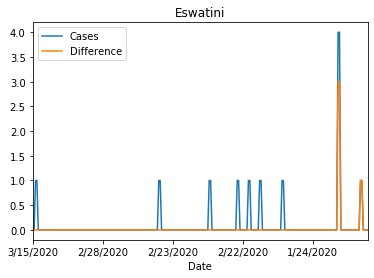

<Figure size 432x288 with 0 Axes>

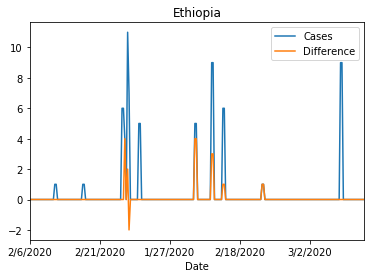

<Figure size 432x288 with 0 Axes>

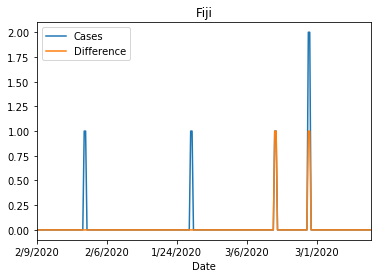

<Figure size 432x288 with 0 Axes>

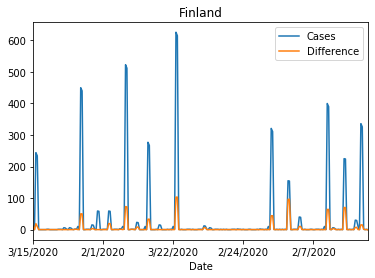

<Figure size 432x288 with 0 Axes>

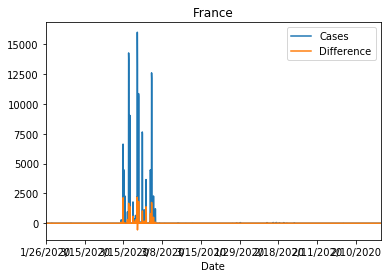

<Figure size 432x288 with 0 Axes>

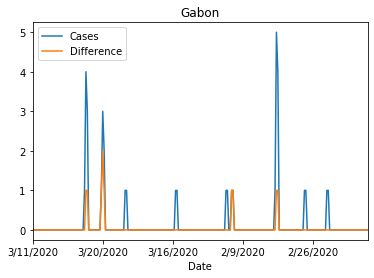

<Figure size 432x288 with 0 Axes>

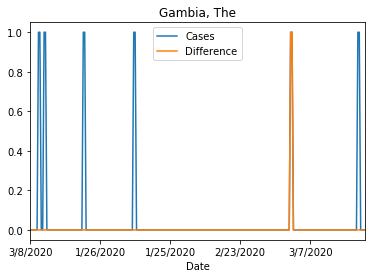

<Figure size 432x288 with 0 Axes>

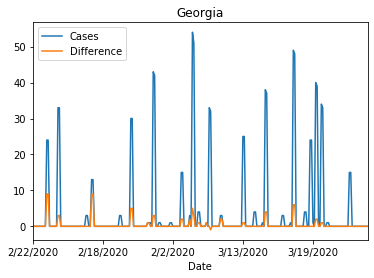

<Figure size 432x288 with 0 Axes>

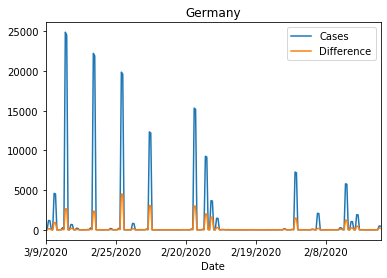

<Figure size 432x288 with 0 Axes>

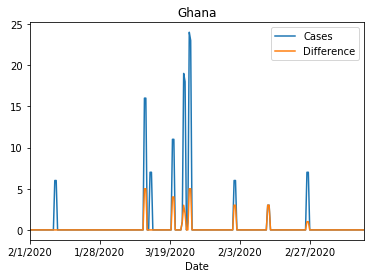

<Figure size 432x288 with 0 Axes>

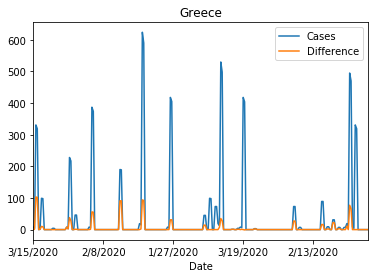

<Figure size 432x288 with 0 Axes>

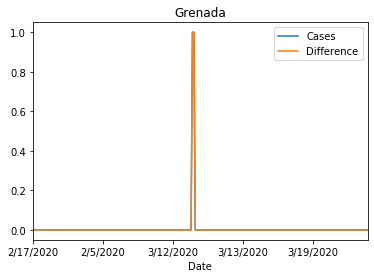

<Figure size 432x288 with 0 Axes>

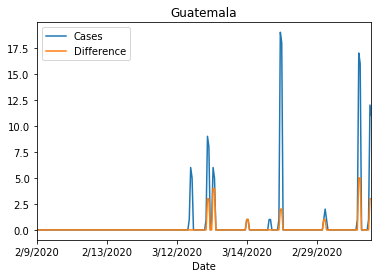

<Figure size 432x288 with 0 Axes>

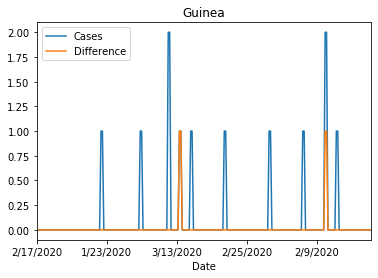

<Figure size 432x288 with 0 Axes>

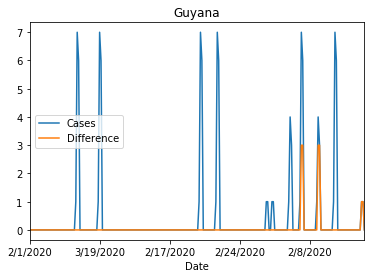

<Figure size 432x288 with 0 Axes>

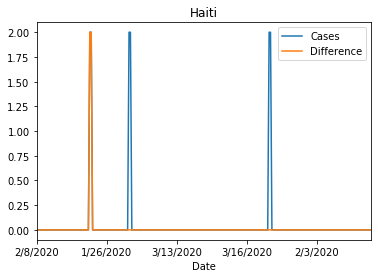

<Figure size 432x288 with 0 Axes>

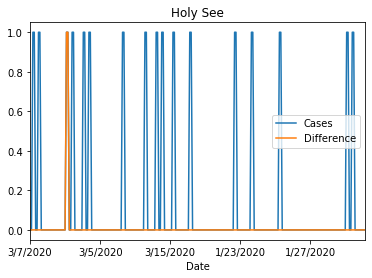

<Figure size 432x288 with 0 Axes>

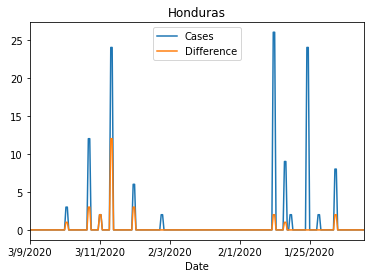

<Figure size 432x288 with 0 Axes>

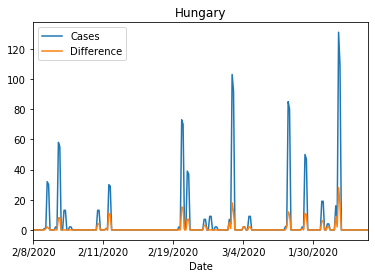

<Figure size 432x288 with 0 Axes>

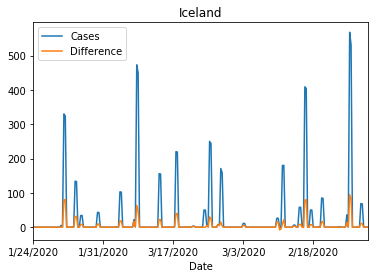

<Figure size 432x288 with 0 Axes>

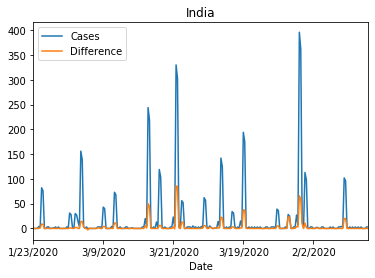

<Figure size 432x288 with 0 Axes>

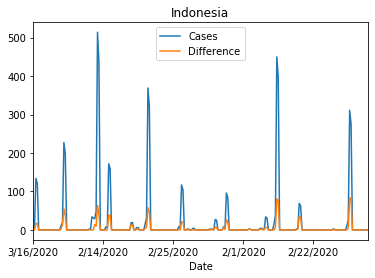

<Figure size 432x288 with 0 Axes>

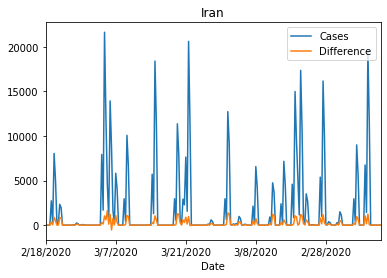

<Figure size 432x288 with 0 Axes>

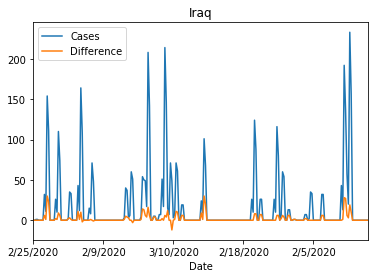

<Figure size 432x288 with 0 Axes>

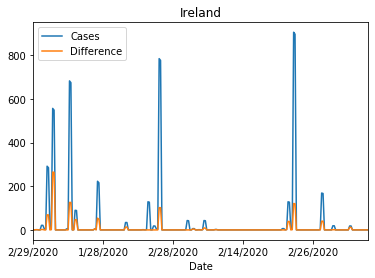

<Figure size 432x288 with 0 Axes>

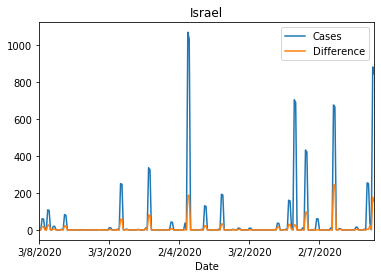

<Figure size 432x288 with 0 Axes>

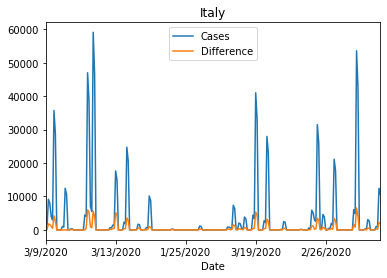

<Figure size 432x288 with 0 Axes>

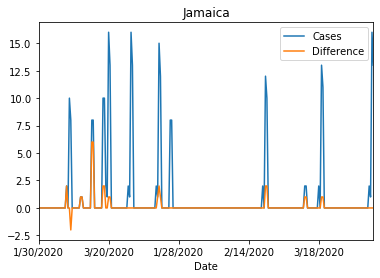

<Figure size 432x288 with 0 Axes>

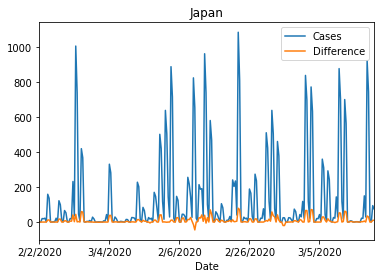

<Figure size 432x288 with 0 Axes>

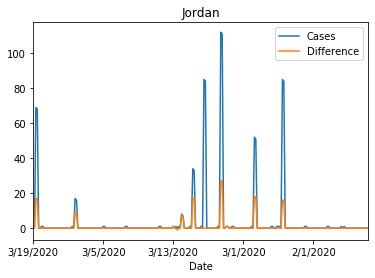

<Figure size 432x288 with 0 Axes>

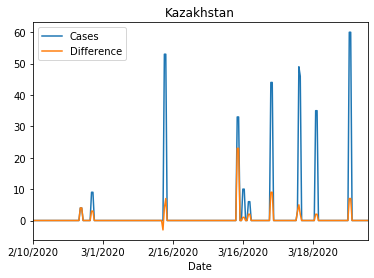

<Figure size 432x288 with 0 Axes>

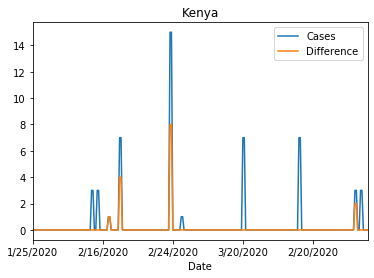

<Figure size 432x288 with 0 Axes>

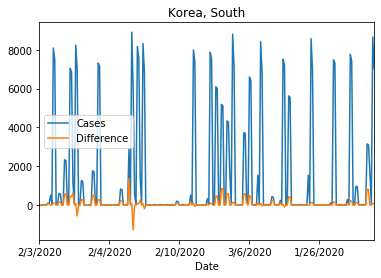

<Figure size 432x288 with 0 Axes>

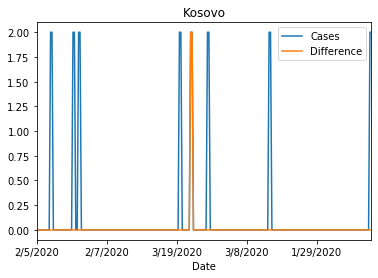

<Figure size 432x288 with 0 Axes>

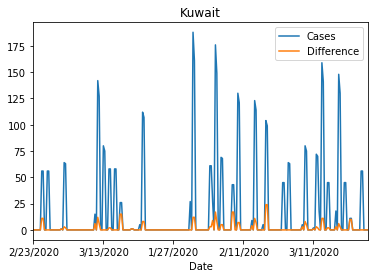

<Figure size 432x288 with 0 Axes>

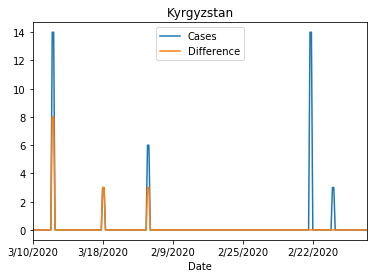

<Figure size 432x288 with 0 Axes>

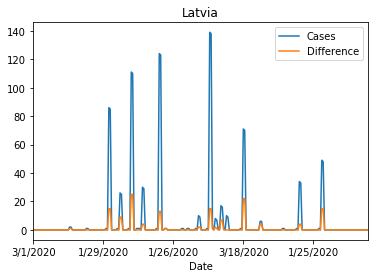

<Figure size 432x288 with 0 Axes>

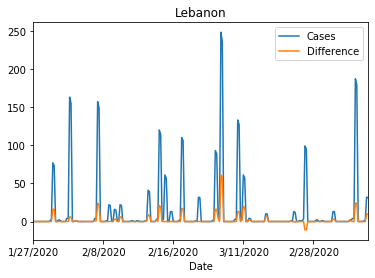

<Figure size 432x288 with 0 Axes>

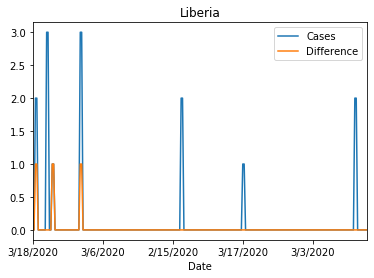

<Figure size 432x288 with 0 Axes>

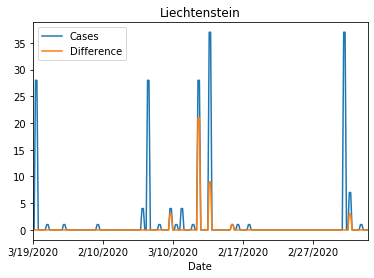

<Figure size 432x288 with 0 Axes>

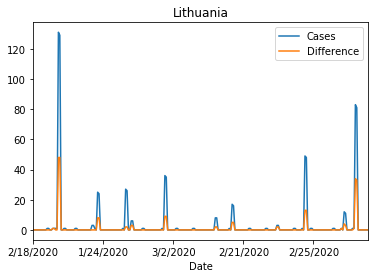

<Figure size 432x288 with 0 Axes>

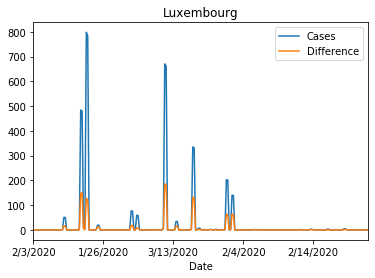

<Figure size 432x288 with 0 Axes>

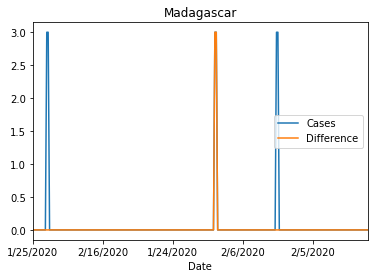

<Figure size 432x288 with 0 Axes>

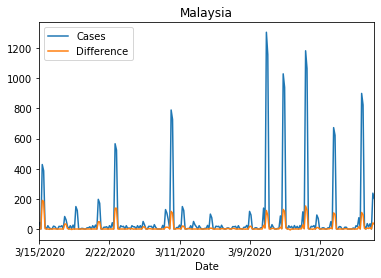

<Figure size 432x288 with 0 Axes>

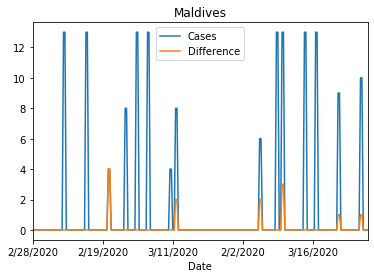

<Figure size 432x288 with 0 Axes>

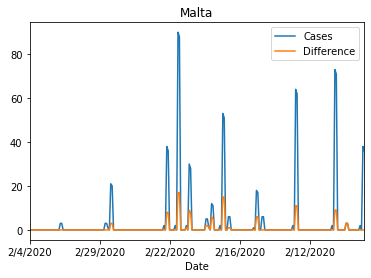

<Figure size 432x288 with 0 Axes>

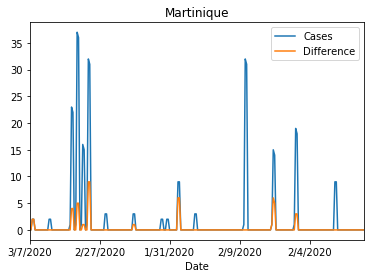

<Figure size 432x288 with 0 Axes>

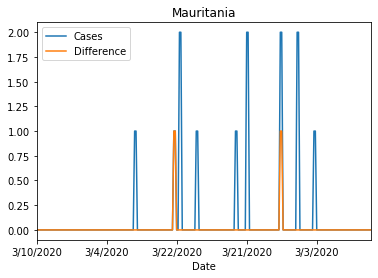

<Figure size 432x288 with 0 Axes>

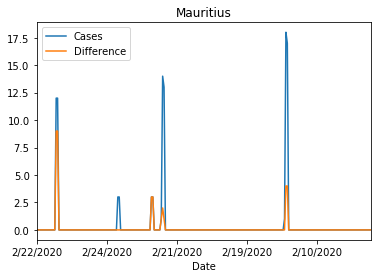

<Figure size 432x288 with 0 Axes>

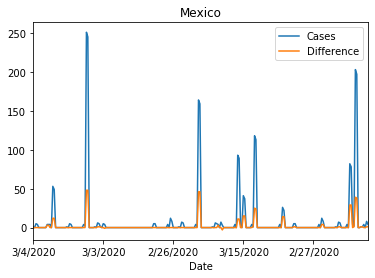

<Figure size 432x288 with 0 Axes>

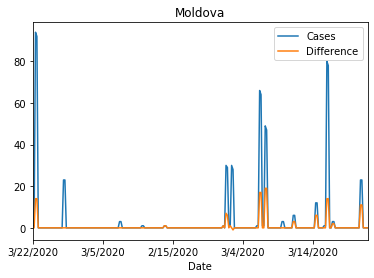

<Figure size 432x288 with 0 Axes>

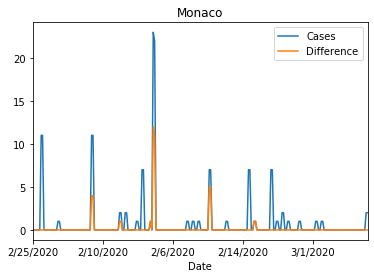

<Figure size 432x288 with 0 Axes>

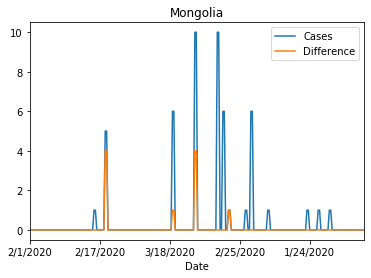

<Figure size 432x288 with 0 Axes>

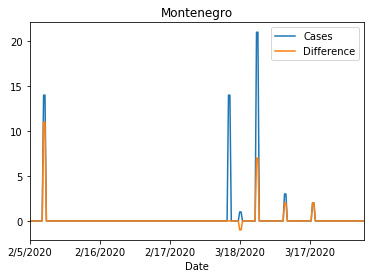

<Figure size 432x288 with 0 Axes>

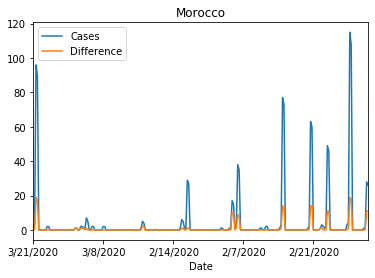

<Figure size 432x288 with 0 Axes>

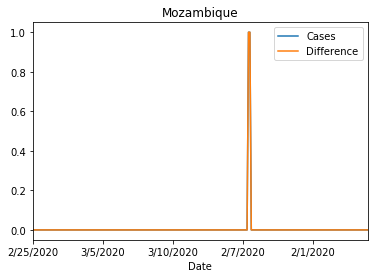

<Figure size 432x288 with 0 Axes>

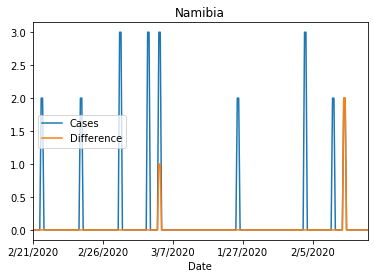

<Figure size 432x288 with 0 Axes>

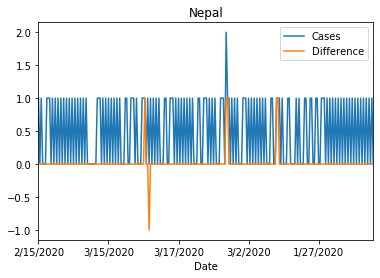

<Figure size 432x288 with 0 Axes>

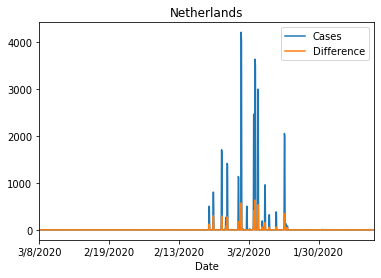

<Figure size 432x288 with 0 Axes>

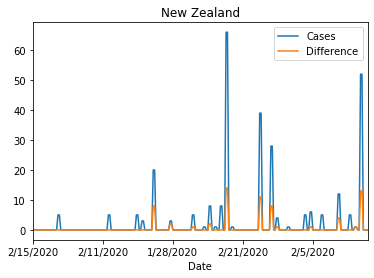

<Figure size 432x288 with 0 Axes>

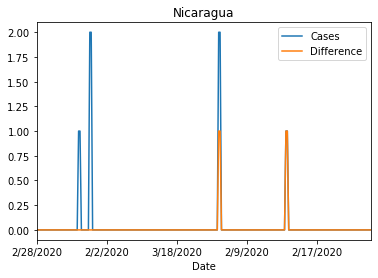

<Figure size 432x288 with 0 Axes>

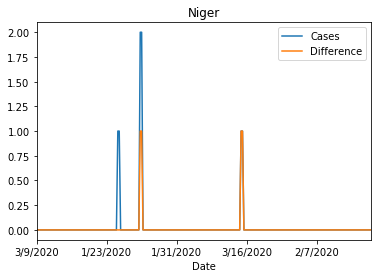

<Figure size 432x288 with 0 Axes>

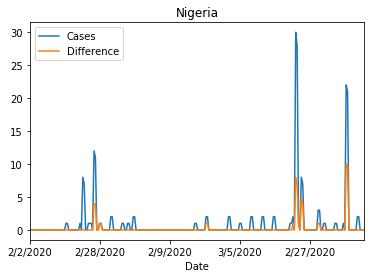

<Figure size 432x288 with 0 Axes>

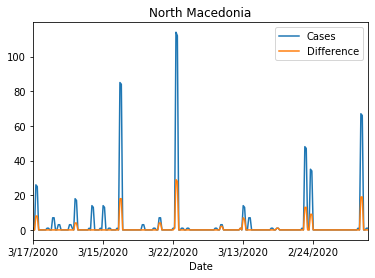

<Figure size 432x288 with 0 Axes>

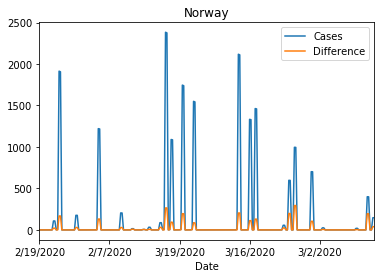

<Figure size 432x288 with 0 Axes>

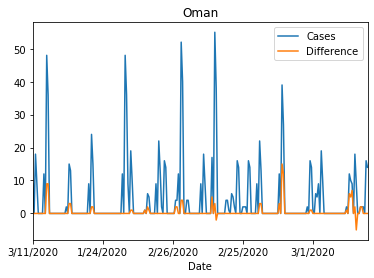

<Figure size 432x288 with 0 Axes>

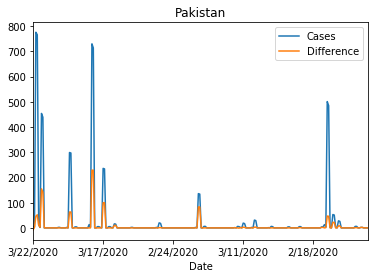

<Figure size 432x288 with 0 Axes>

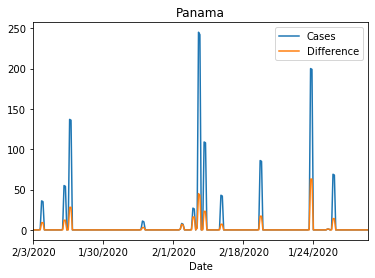

<Figure size 432x288 with 0 Axes>

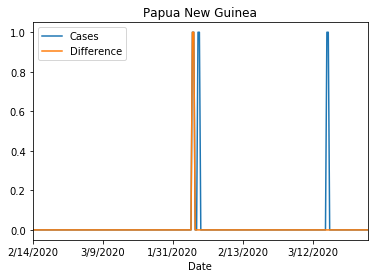

<Figure size 432x288 with 0 Axes>

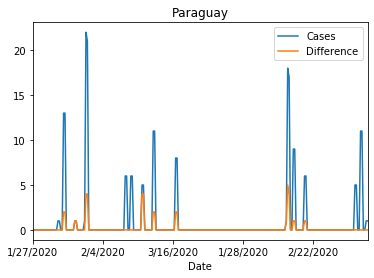

<Figure size 432x288 with 0 Axes>

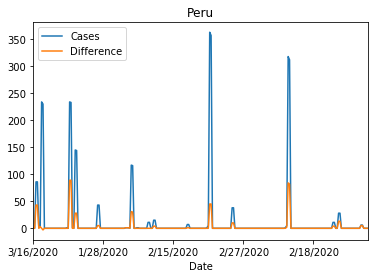

<Figure size 432x288 with 0 Axes>

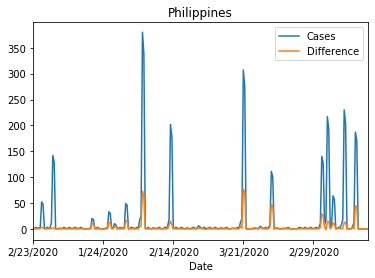

<Figure size 432x288 with 0 Axes>

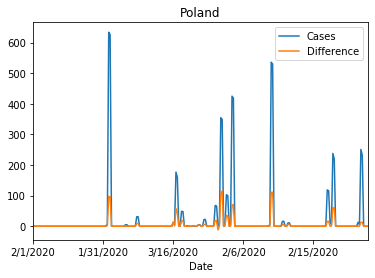

<Figure size 432x288 with 0 Axes>

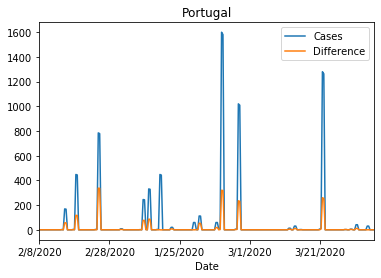

<Figure size 432x288 with 0 Axes>

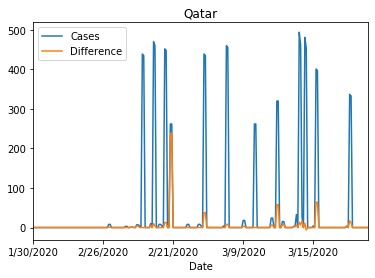

<Figure size 432x288 with 0 Axes>

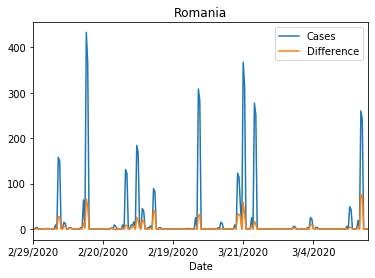

<Figure size 432x288 with 0 Axes>

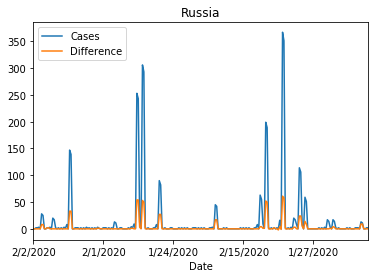

<Figure size 432x288 with 0 Axes>

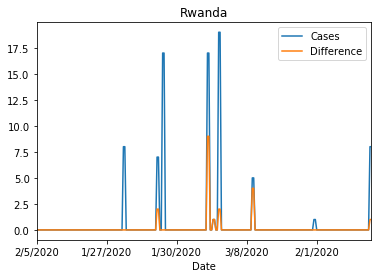

<Figure size 432x288 with 0 Axes>

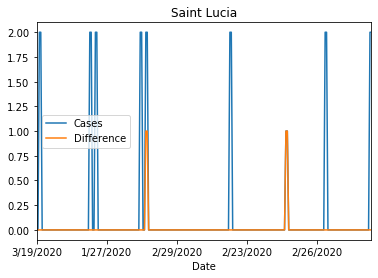

<Figure size 432x288 with 0 Axes>

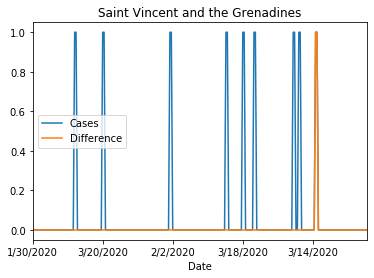

<Figure size 432x288 with 0 Axes>

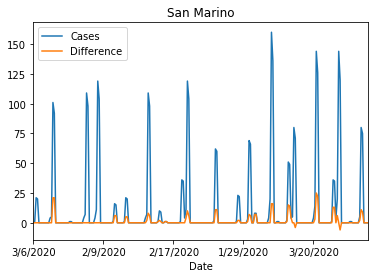

<Figure size 432x288 with 0 Axes>

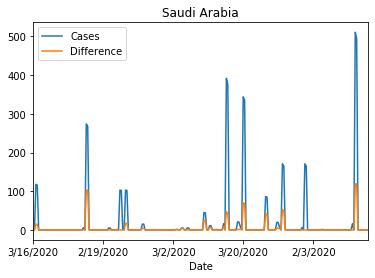

<Figure size 432x288 with 0 Axes>

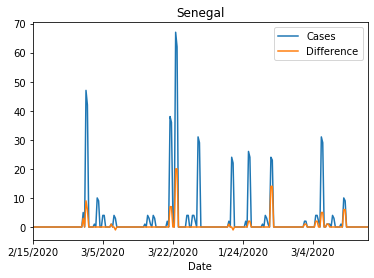

<Figure size 432x288 with 0 Axes>

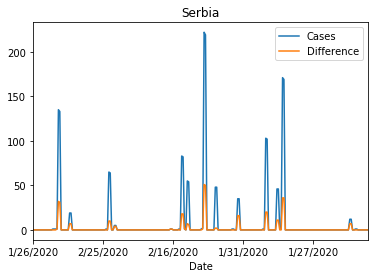

<Figure size 432x288 with 0 Axes>

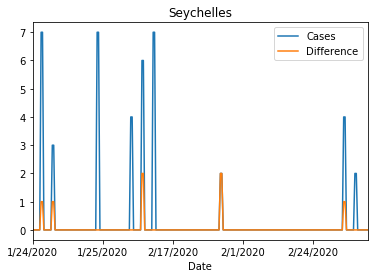

<Figure size 432x288 with 0 Axes>

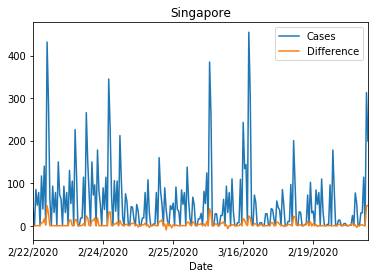

<Figure size 432x288 with 0 Axes>

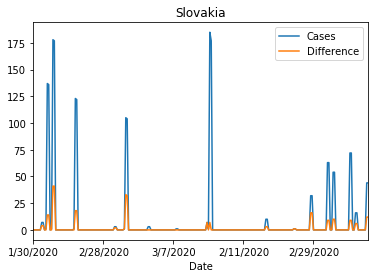

<Figure size 432x288 with 0 Axes>

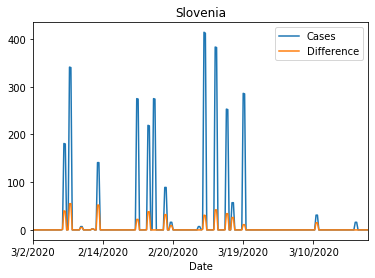

<Figure size 432x288 with 0 Axes>

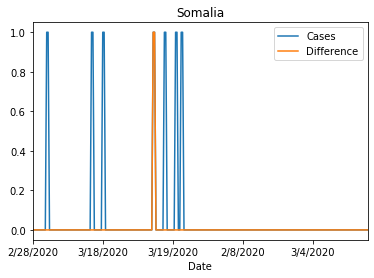

<Figure size 432x288 with 0 Axes>

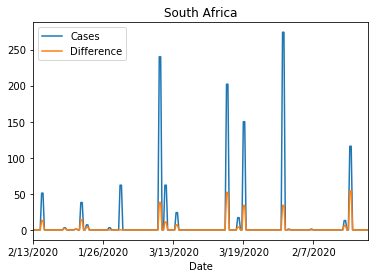

<Figure size 432x288 with 0 Axes>

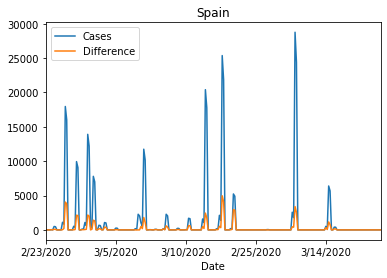

<Figure size 432x288 with 0 Axes>

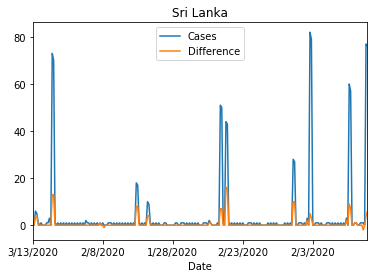

<Figure size 432x288 with 0 Axes>

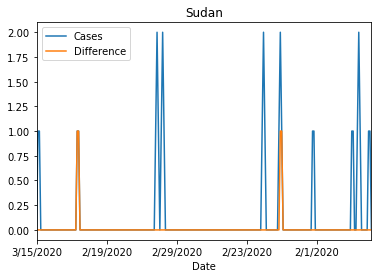

<Figure size 432x288 with 0 Axes>

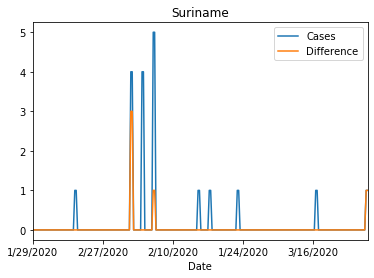

<Figure size 432x288 with 0 Axes>

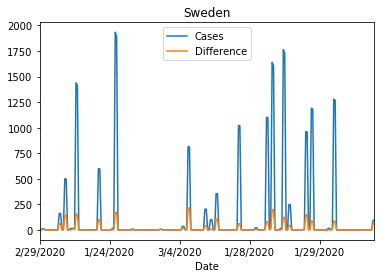

<Figure size 432x288 with 0 Axes>

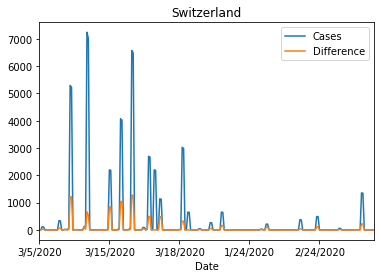

<Figure size 432x288 with 0 Axes>

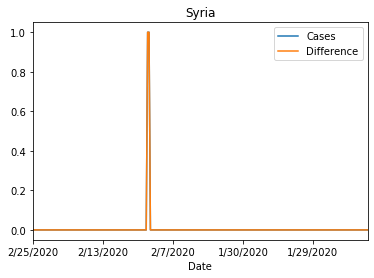

<Figure size 432x288 with 0 Axes>

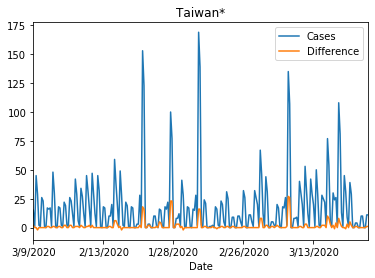

<Figure size 432x288 with 0 Axes>

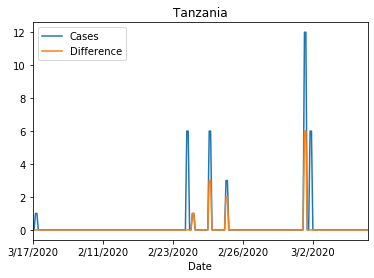

<Figure size 432x288 with 0 Axes>

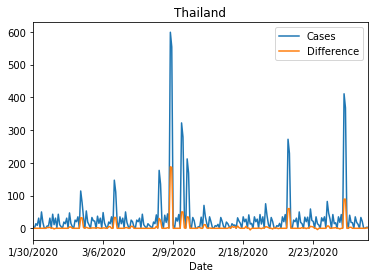

<Figure size 432x288 with 0 Axes>

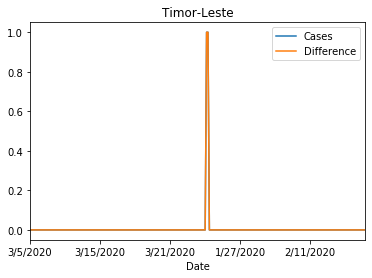

<Figure size 432x288 with 0 Axes>

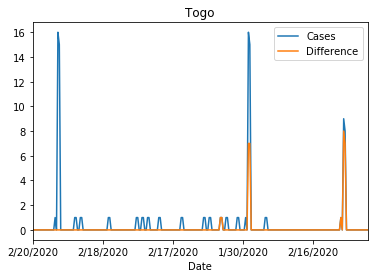

<Figure size 432x288 with 0 Axes>

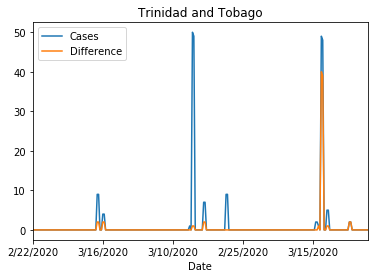

<Figure size 432x288 with 0 Axes>

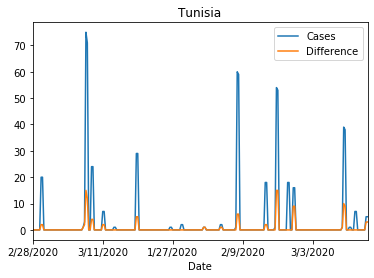

<Figure size 432x288 with 0 Axes>

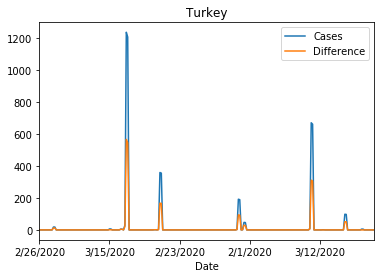

<Figure size 432x288 with 0 Axes>

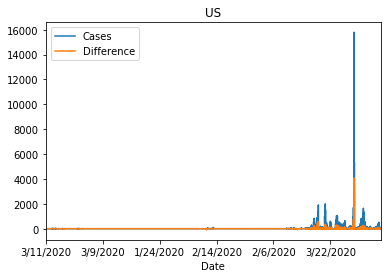

<Figure size 432x288 with 0 Axes>

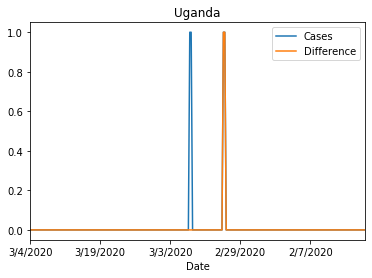

<Figure size 432x288 with 0 Axes>

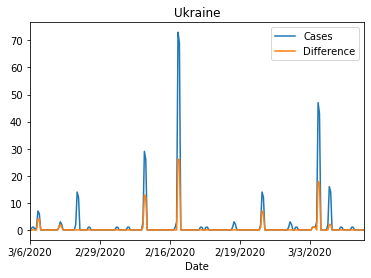

<Figure size 432x288 with 0 Axes>

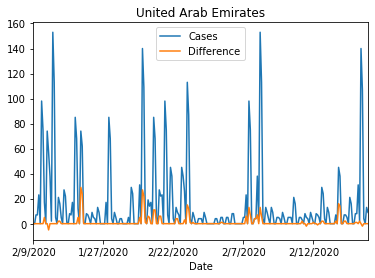

<Figure size 432x288 with 0 Axes>

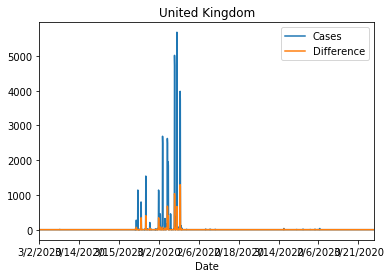

<Figure size 432x288 with 0 Axes>

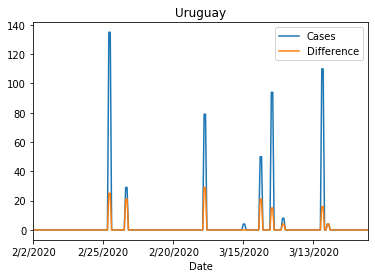

<Figure size 432x288 with 0 Axes>

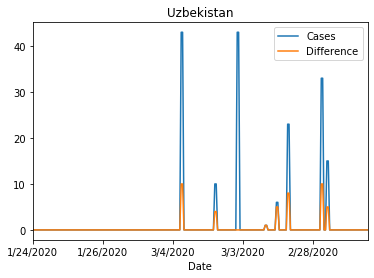

<Figure size 432x288 with 0 Axes>

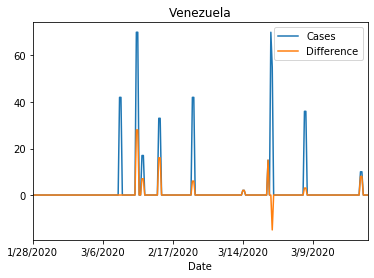

<Figure size 432x288 with 0 Axes>

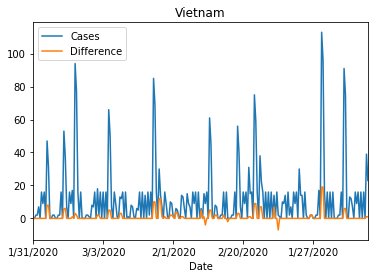

<Figure size 432x288 with 0 Axes>

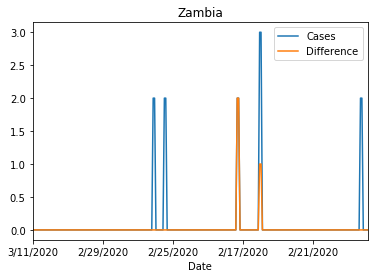

<Figure size 432x288 with 0 Axes>

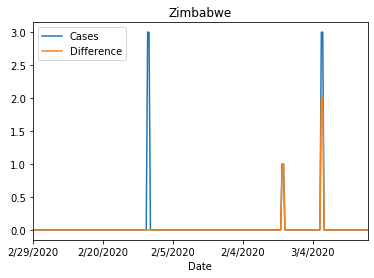

In [22]:
for country, df_country in df_plot_cases.groupby('Country_Region'):
    plt.figure()
    ax = df_country.plot()
    ax.set_title(country)
    plt.show()

In [15]:
df_country

,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
Date,,,,,,,,,
2/29/2020,Zimbabwe,NaN,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
2/29/2020,Zimbabwe,NaN,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
2/29/2020,Zimbabwe,NaN,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
2/29/2020,Zimbabwe,NaN,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
2/25/2020,Zimbabwe,NaN,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
...,...,...,...,...,...,...,...,...,...
1/27/2020,Zimbabwe,NaN,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
3/12/2020,Zimbabwe,NaN,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
3/12/2020,Zimbabwe,NaN,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,-20.0,30.0
